In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

### Notes from viz lectures

### Simplification
* Figure out consolidation schemes--ratios might be useful for rxtr params
* Exclude or dim unimportant data

### Headings for training set viz
* Goal for i.i.d. training set accomplished / not accomplished
* Certain locations in training set space difficult to predict OR error higher in certain locations in training set space
* Natural uranium not reliably predicted by any algorithm
* Complex models predict x parameters better than simple models (or vice versa)

In [29]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }
# set params
# save as .mplstyle file and import with: plt.style.use('file')
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]


## Predictions

In [215]:
rxtr = pd.read_csv('results/28march2018/sfcompo_fissact_reactor_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# MWd/MTU
burn = pd.read_csv('results/28march2018/sfcompo_fissact_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# %u235
enri = pd.read_csv('results/28march2018/sfcompo_fissact_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# days
cool = pd.read_csv('results/28march2018/sfcompo_fissact_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})

rxtr.columns

Index(['Instance', 'Ridge', 'SVR', 'TrueY', 'kNN'], dtype='object')

## Scores

In [151]:
r_scr = pd.read_csv('results/3april2018/sfcompo_fissactreactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
# MWd/MTU
b_scr = pd.read_csv('results/3april2018/sfcompo_fissactburnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
# %u235
e_scr = pd.read_csv('results/3april2018/sfcompo_fissactenrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
# days
c_scr = pd.read_csv('results/3april2018/sfcompo_fissactcooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})



### Errors

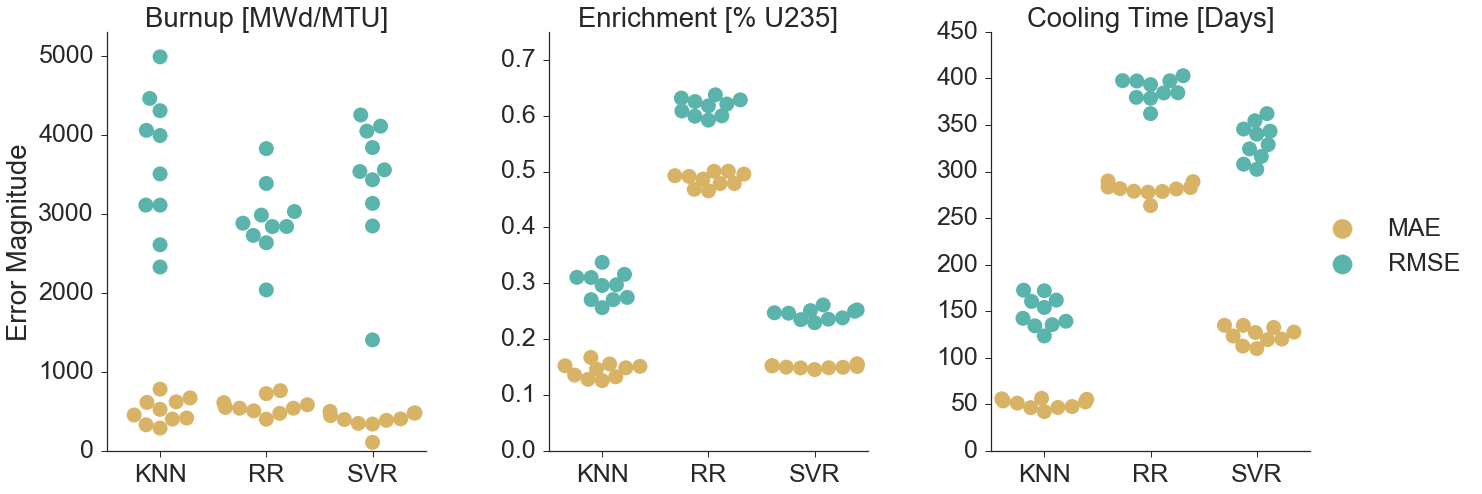

In [189]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)
b = b_scr.loc[:, ['algorithm', 'test_neg_mean_absolute_error', 'test_neg_rmse']]
e = e_scr.loc[:, ['algorithm', 'test_neg_mean_absolute_error', 'test_neg_rmse']]
c = c_scr.loc[:, ['algorithm', 'test_neg_mean_absolute_error', 'test_neg_rmse']]
b['Parameter'] = 'Burnup [MWd/MTU]'
e['Parameter'] = 'Enrichment [% U235]'
c['Parameter'] = 'Cooling Time [Days]'

err = pd.DataFrame()
err = pd.concat([b, e, c])
err['MAE'] = -1 * err['test_neg_mean_absolute_error']
err['RMSE'] = -1 * err['test_neg_rmse']

err = err.melt(id_vars = ['algorithm', 'Parameter'], 
               value_vars = ['MAE', 'RMSE'], 
               value_name='Error Magnitude', var_name='Error')

mer = sns.factorplot(x="algorithm", y='Error Magnitude',
                     hue='Error', col="Parameter", 
                     sharey=False, s=15, legend=False,
                     palette=sns.color_palette(med), 
                     data=err, kind="swarm", size=8, aspect=.8)

(mer.set_axis_labels("", "Error Magnitude")
    .set_xticklabels(["KNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .add_legend(markerscale=2.5))
mer.axes[0,0].set_ylim(0, 5300)
mer.axes[0,1].set_ylim(0, 0.75)
mer.axes[0,2].set_ylim(0, 450)
mer.savefig('error.png', bbox_inches='tight', transparent=True)

### Variance

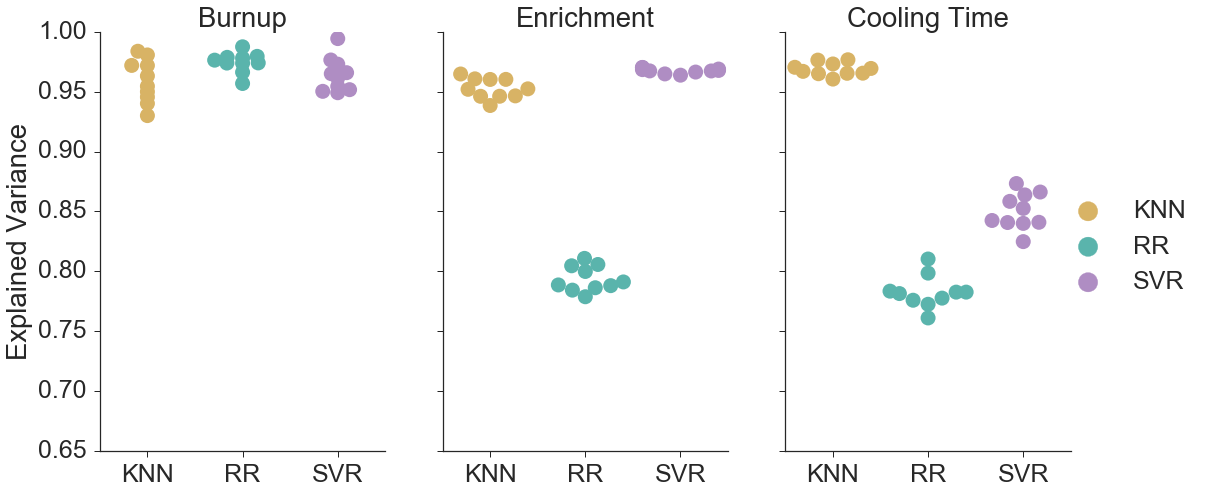

In [192]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)
b = b_scr.loc[:, ['algorithm', 'test_explained_variance']]
e = e_scr.loc[:, ['algorithm', 'test_explained_variance']]
c = c_scr.loc[:, ['algorithm', 'test_explained_variance']]
b['Parameter'] = 'Burnup'
e['Parameter'] = 'Enrichment'
c['Parameter'] = 'Cooling Time'
scr = pd.DataFrame()
scr = pd.concat([b, e, c])

var = sns.factorplot(x="algorithm", y="test_explained_variance",
                     hue="algorithm", col="Parameter",
                     s=15, legend=False,
                     palette=sns.color_palette(med), 
                     data=scr, kind="swarm", size=8, aspect=.65)

(var.set_axis_labels("", "Explained Variance")
    .set_xticklabels(["KNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .set(ylim=(0.65, 1.0))
    .add_legend(markerscale=2.5))
new_labels = ['KNN', 'RR', 'SVR']
for t, l in zip(var._legend.texts, new_labels): t.set_text(l)
var.savefig('variance.png', bbox_inches='tight', transparent=True)

In [25]:
trainXY = pd.read_pickle("sfcompo_pickles/not-scaled_trainset_nucs_fissact_8dec.pkl")
#x = len(trainXY.columns)-3
#dfX = trainXY.iloc[:, 0:x]
#dfY_e = trainXY.iloc[:, x+1]
#dfY_b = trainXY.iloc[:, x+2]
trainXY.columns

Index(['Burnup', 'CoolingTime', 'Enrichment', 'ReactorType', 'ba138', 'ce140',
       'ce142', 'ce144', 'cs133', 'cs135', 'cs137', 'la139', 'mo100', 'mo95',
       'mo97', 'mo98', 'nd143', 'nd144', 'nd145', 'nd146', 'pd104', 'pd105',
       'pd106', 'pr141', 'pu239', 'pu240', 'pu241', 'pu242', 'rb87', 'rh103',
       'ru101', 'ru102', 'ru104', 'sr88', 'sr90', 'tc99', 'total', 'u234',
       'u235', 'u236', 'u238', 'xe131', 'xe132', 'xe134', 'xe136', 'y89',
       'zr91', 'zr92', 'zr93', 'zr94', 'zr96'],
      dtype='object')

In [26]:
# nucs messed up somehow and labels are at beginning
#x = len(trainXY.columns)
#dfY_b = trainXY.iloc[:, 0]//1000
#dfY_c = trainXY.iloc[:, 1]//30
#dfY_e = trainXY.iloc[:, 2]
#fY_r = trainXY.iloc[:, 3]
#dfX = trainXY.iloc[:, 4:x]

burn_name = 'Burnup [GWd/MTU]'
cool_name = 'Cooling Time [Months]'
enr_name = 'Enrichment [% U235]'
rxtr_name = 'Reactor Type'
trainXY[burn_name] = trainXY['Burnup']//1000
trainXY[cool_name] = trainXY['CoolingTime']//30
trainXY[enr_name] = trainXY['Enrichment']
trainXY[rxtr_name] = trainXY['ReactorType']

## Training Set Space Visualized

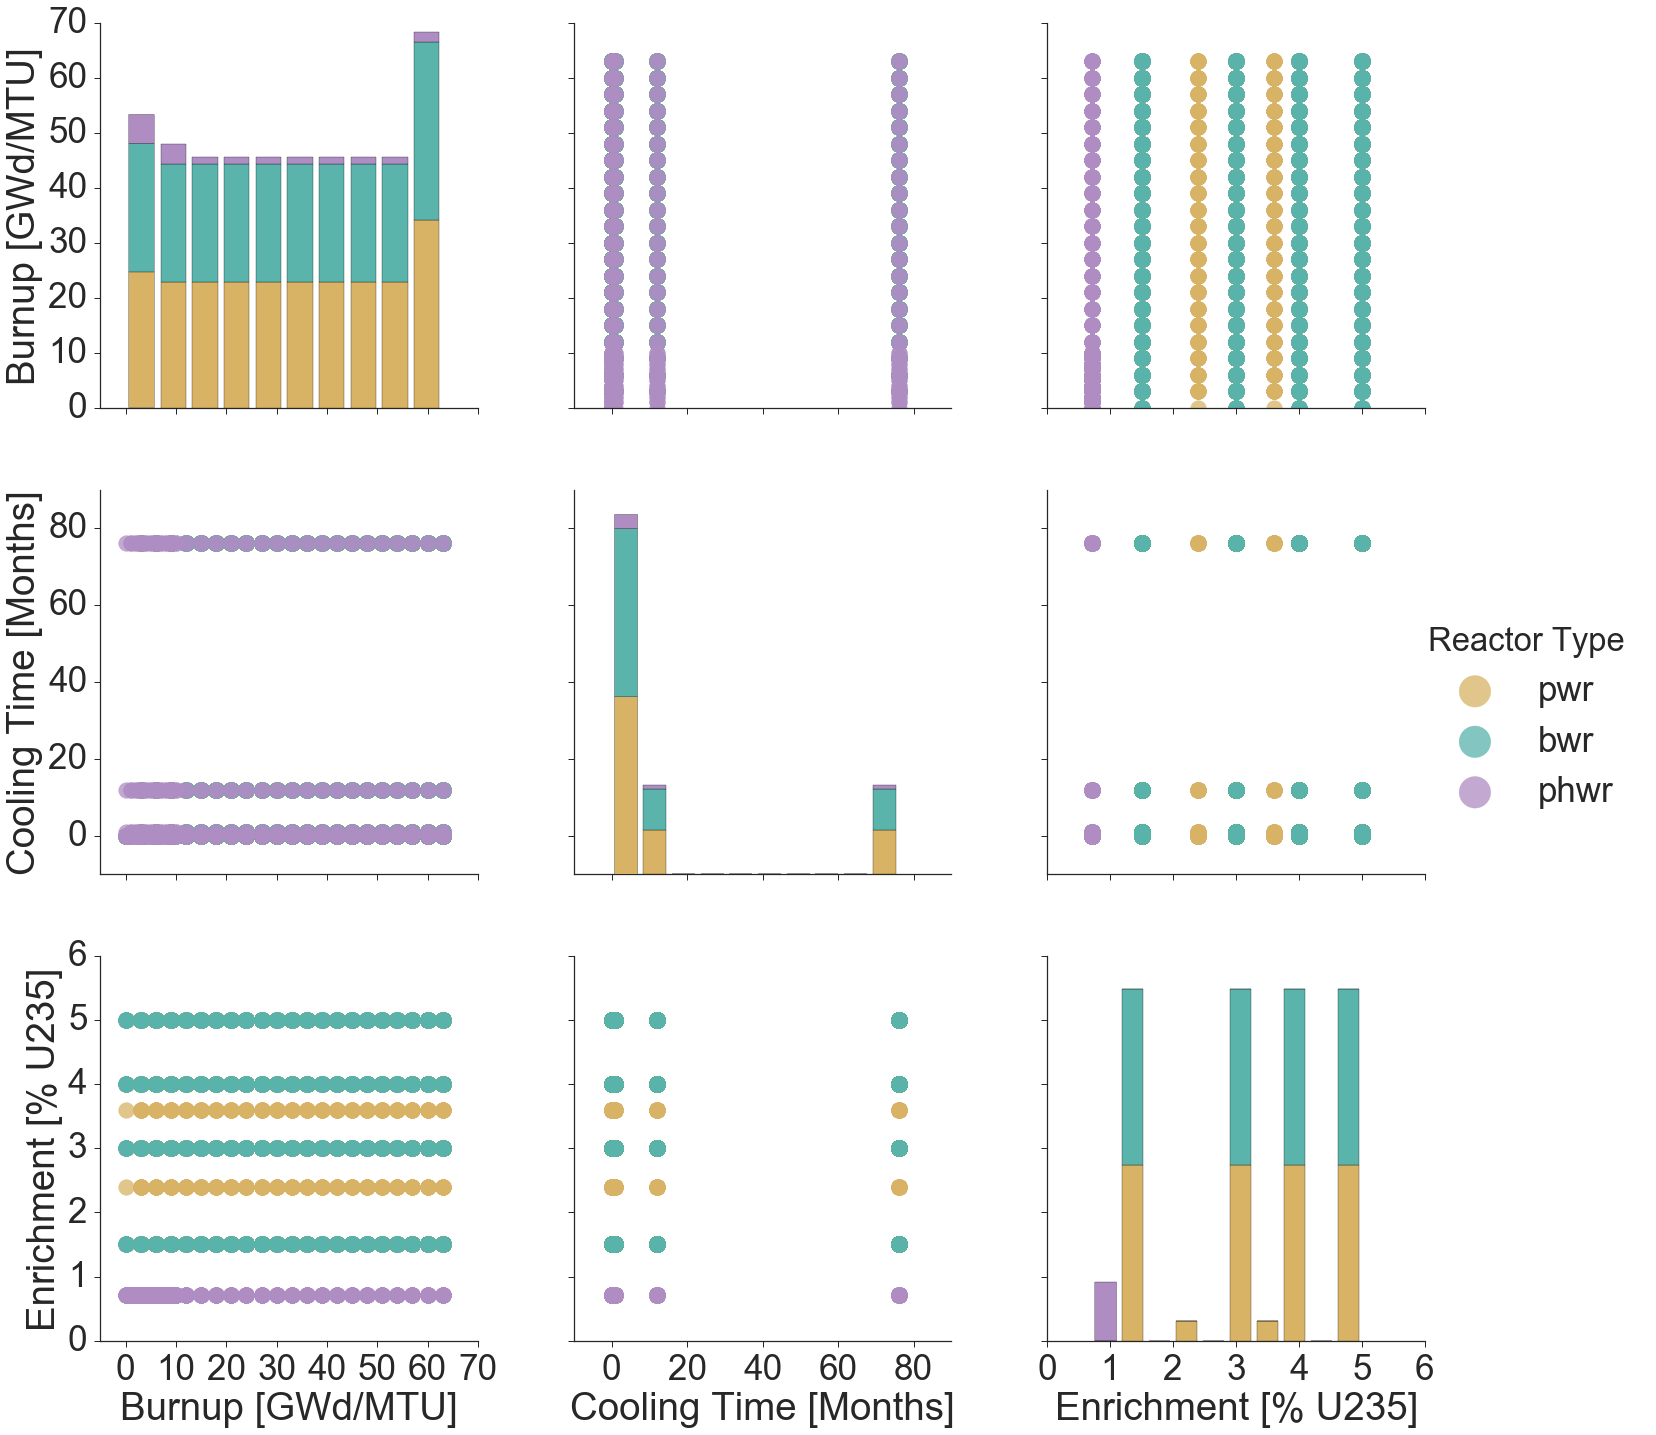

In [209]:
plt.clf()
train = trainXY[[burn_name, cool_name, enr_name, rxtr_name]]
g = sns.set(style="ticks", font_scale=3.5)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=250, alpha=0.75)
g.axes[0,0].set_ylim(0, 70)
g.axes[2,0].set_xlim(-5, 70)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(var._legend.texts, new_labels): t.set_text(l)

g.savefig('train_set.png', bbox_inches='tight', transparent=True)

## Predictions

In [80]:
burn.sample(3)

,Instance,Ridge,SVR,TrueY,kNN
375,2.100e+03,62833.397953,62935.728697,63000,63000.0
4451,1.000e+02.2,2752.396378,2981.260532,3000,3000.0
9350,2.100e+03.1,42012.773442,41994.567436,42000,42000.0


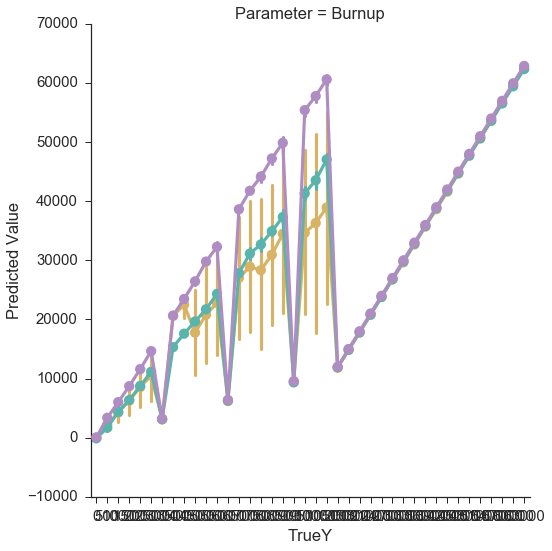

In [217]:
plt.clf()
sns.set(style="ticks", font_scale=1.5)

#burn = burn.loc[:, ['TrueY', 'kNN', 'Ridge', 'SVR']//1000
#cool = cool.loc[:, ['TrueY', 'kNN', 'Ridge', 'SVR']//30
burn['Parameter'] = 'Burnup'
#enri['Parameter'] = 'Enrichment'
#cool['Parameter'] = 'Cooling Time'

pred = burn#pd.DataFrame()
#pred = pd.concat([burn, enri, cool])
pred = pred.melt(id_vars = ['TrueY', 'Parameter'], 
                 value_vars = ['kNN', 'Ridge', 'SVR'], 
                 value_name='Predicted Value', var_name='Algorithm')
pred = sns.factorplot(x="TrueY", y="Predicted Value",
                      hue="Algorithm", col="Parameter",
                      sharey=False, s=15, legend=False,
                      palette=sns.color_palette(med), 
                      kind='point',
                      data=pred, size=8)

(var.set_axis_labels("Ground Truth", "Predicted Value")
    .set_titles("{col_name}")
    #.set(ylim=(0.65, 1.0))
    .add_legend(markerscale=2.5))
#new_labels = ['KNN', 'RR', 'SVR']
#for t, l in zip(var._legend.texts, new_labels): t.set_text(l)
#var.savefig('predicctions.png', bbox_inches='tight', transparent=True)



#fig, axScatter = plt.subplots(figsize=(10, 10))
#axScatter.scatter(x, knn, s=100, c=colors['MBrwn'], marker='s', label='kNN')
##axScatter.scatter(x, rr, s=100, c=colors['MPurp'], marker='^', label='Ridge')
#axScatter.scatter(x, svr, s=100, c=colors['MTeal'], marker='D', label='SVR')
#plt.plot([-5, -5], [65, 65], 'k-')
#axScatter.legend()
#plt.xlabel('Burnup Ground Truth [GWd/MTU]', fontsize=16)
#plt.ylabel('Burnup Prediction', fontsize=16)

## Burnup v. Enrichment here

In [25]:
x = dfY_b//1000.
y = dfY_e
#bin stuff
xbin = 1.5
ybin = 0.15
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))
xlim = (int(xmax/xbin) + 1)*xbin
ylim = (int(ymax/ybin) + 1)*ybin
xbins = np.arange(0, xlim + xbin, xbin)
ybins = np.arange(0, ylim + ybin, ybin)
xcount, xdivs = np.histogram(x, bins=xbins)
ycount, ydivs = np.histogram(y, bins=ybins)

## Correlate Features

In [14]:
cols_fissact = ['u235', 'u236', 'u238',
                'pu239', 'pu240', 'pu241', 'pu242',
               ]
df_filtered = dfX[cols_fissact]

corr = df_filtered.corr()
#plt.matshow(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
#other features

other_cols = ['cs137', 'u234', 'sr90', 'u238', ]
df_other = dfX[other_cols]

other_corr = df_other.corr()
sns.heatmap(other_corr, 
            xticklabels=other_corr.columns.values,
            yticklabels=other_corr.columns.values, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
sns.pairplot(df_other)

In [ ]:
fig, axScatter = plt.subplots(figsize=(7, 7))
#axScatter.scatter(x, y, s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
axScatter.scatter(x, y, s=ycount*0.1, c='k', alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
# commenting out diff algs; can do diff plots
axScatter.scatter(burn_knn, enr_knn, s=ycount*0.1, c=colors['MBrwn'], alpha=0.5, linewidths=0.1, marker='s', label='kNN Pred')
#axScatter.scatter(burn_rr, enr_rr, s=ycount*0.1, c=colors['MPurp'], alpha=0.5, linewidths=0.1, marker='s', label='Ridge Pred')
#axScatter.scatter(burn_svr, enr_svr, s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='s', label='SVR Pred')
#axScatter.legend()
plt.xlabel('Burnup [GWd/MTU]', fontsize=16)
plt.ylabel('Enrichment [%U235]', fontsize=16)
# comment out to see the really bad predictions
#plt.ylim(ymax=6)
fig.savefig('test.png', bbox_inches='tight')
plt.show()

In [ ]:
fig.clf()
fig, axScatter = plt.subplots(figsize=(12,10))
#fig.suptitle('test title', fontsize=20)
axScatter.scatter(x, y, c='k', s=10, linewidths=0.1, marker='o', label='Ground Truth')
#axScatter.scatter(burn_knn, enr_knn, c=colors['MBrwn'], s=10, linewidths=0.1, marker='s', label='kNN Pred')
#axScatter.scatter(burn_rr, enr_rr, c=colors['MPurp'], s=10, linewidths=0.1, marker='s', label='Ridge Pred')
axScatter.scatter(burn_svr, enr_svr, c=colors['MTeal'], s=10, linewidths=0.1, marker='s', label='SVR Pred')
axScatter.legend()
plt.xlabel('Burnup [GWd/MTU]', fontsize=16)
plt.ylabel('Enrichment [%U235]', fontsize=16)
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1, pad=0.2, sharex=axScatter)
axHisty = divider.append_axes("right", 1.75, pad=0.2, sharey=axScatter)
axHistx.hist(x, bins=xbins, color='0.5')
axHisty.hist(y, bins=ybins, orientation='horizontal', color='0.5')
plt.setp(axHistx.get_xticklabels(), visible=False)
plt.setp(axHisty.get_yticklabels(), visible=False)
axHistx.set_yticks([0, 250, 500])
axHisty.set_xticks([0, 1000, 2000])
# comment out to see the really bad predictions
#plt.ylim(ymax=6)
plt.show()